### DATA PT14-extra - Proyecto final - Grupo 3
#### Control de calidad de los datos del archivo Google Maps metadata_sitios de los estados

In [171]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [172]:
# # Obtener la lista de archivos JSON en carpeta
# archivos_json = glob.glob(os.path.join(carpeta, "*.json"))

# # Función para leer un JSON individualmente
# def leer_json(archivo):
#     return pd.read_json(archivo, lines=True)

# # Usar múltiples hilos para leer los archivos más rápido
# with ThreadPoolExecutor() as executor:
#     df_list = list(executor.map(leer_json, archivos_json))

# # Concatenar los DataFrames en uno solo
# metadata_sitios = pd.concat(df_list, ignore_index=True)

# metadata_sitios.head()

In [173]:

# Ruta al archivo JSON (ajustala si es necesario)
archivos = r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\maps'


In [174]:
archivos_json = glob.glob(os.path.join(archivos, "*.json"))

In [175]:
# Se guardará archivos JSON en formato pickle (binario) el cual es más rápido para futuras consultas
for archivos in archivos_json:
    df = pd.read_json(archivos, lines=True)
    df.to_pickle(archivos.replace(".json", ".pkl"))  # Guardar como .pkl

In [176]:
## Carga los archivos Pickle generados y los combina en un solo DataFrame.
#df_list = [pd.read_pickle(archivo.replace(".json", ".pkl")) for archivo in archivos_json] # convierte el nombre de cada archivo de .json a .pkl para cargarlo correctamente.
#metadata_sitio = pd.concat(df_list, ignore_index=True)

#metadata_sitio.head()


In [177]:
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [178]:
df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews'],
      dtype='object')

In [179]:
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            274994 non-null  object 
 1   address         264939 non-null  object 
 2   gmap_id         275001 non-null  object 
 3   description     13155 non-null   object 
 4   latitude        275001 non-null  float64
 5   longitude       275001 non-null  float64
 6   category        272740 non-null  object 
 7   avg_rating      275001 non-null  float64
 8   num_of_reviews  275001 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.9+ MB


In [181]:
categorias_unicas = pd.DataFrame(df["category"].explode().unique(), columns=["category"])

In [182]:
categorias_unicas.head()

,category
0,Pharmacy
1,Textile exporter
2,Korean restaurant
3,Fabric store
4,Restaurant


In [183]:
unique_resto = unique_categories[unique_categories[0].str.lower().str.contains("restaurant", na=False)]
unique_resto


,0
2,Korean restaurant
4,Restaurant
8,Health food restaurant
184,Buffet restaurant
238,Fast food restaurant
...,...
3697,Romanian restaurant
3710,Takoyaki restaurant
3720,Afghani restaurant
3751,Fish and seafood restaurant


In [184]:
print(unique_resto.to_string())

                                         0
2                        Korean restaurant
4                               Restaurant
8                   Health food restaurant
184                      Buffet restaurant
238                   Fast food restaurant
310                      Family restaurant
311                     Seafood restaurant
338                   Dominican restaurant
356                        Taco restaurant
412                     Mexican restaurant
448                     Restaurant or cafe
491                   Breakfast restaurant
492                       Lunch restaurant
603                       Asian restaurant
604                     Hot pot restaurant
605                     Chinese restaurant
640               Mediterranean restaurant
670                     Takeout Restaurant
730                     Italian restaurant
734                       Ramen restaurant
743                    American restaurant
745               Modern French restaurant
811        

In [185]:
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [186]:
print(unique_resto.to_string())

                                         0
2                        Korean restaurant
4                               Restaurant
8                   Health food restaurant
184                      Buffet restaurant
238                   Fast food restaurant
310                      Family restaurant
311                     Seafood restaurant
338                   Dominican restaurant
356                        Taco restaurant
412                     Mexican restaurant
448                     Restaurant or cafe
491                   Breakfast restaurant
492                       Lunch restaurant
603                       Asian restaurant
604                     Hot pot restaurant
605                     Chinese restaurant
640               Mediterranean restaurant
670                     Takeout Restaurant
730                     Italian restaurant
734                       Ramen restaurant
743                    American restaurant
745               Modern French restaurant
811        

In [ ]:
# selecciono las filas que tienen pizza restaurant
# df_sitios_net = df_sitios_net[df_sitios_net['category'].apply(lambda x: 'Pizza restaurant' in x)]
# TypeError: argument of type 'NoneType' is not iterable

df_sitios_rest = df[df['category'].apply(lambda x: isinstance(x, list) and 'Pizza restaurant' in x)]

In [188]:
df_sitios_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 1045 to 274748
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            970 non-null    object 
 1   address         970 non-null    object 
 2   gmap_id         970 non-null    object 
 3   description     351 non-null    object 
 4   latitude        970 non-null    float64
 5   longitude       970 non-null    float64
 6   category        970 non-null    object 
 7   avg_rating      970 non-null    float64
 8   num_of_reviews  970 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 75.8+ KB


Hay 1045 pizza restaurants. Solo 970 tienen direccion.

In [189]:
# la columna address tiene datos de nombre, direccion, localidad, codigo postal y estado
# pongo cada datos en una columna distinta porque puedo necesitarlos mas adelante
print(df_sitios_rest['address'].iloc[0])
print(df_sitios_rest['address'].iloc[5])
print(df_sitios_rest['address'].iloc[10])
print(df_sitios_rest['address'].iloc[15])



Sir Pizza Xpress, 201 E Broad St, Smithville, TN 37166
Sgambati's New York Pizza, 2725 Manitowoc Rd, Green Bay, WI 54311
Higgy's Pizza, 4104 KY-3630, Annville, KY 40402
Alpine Pizza, 1104 U.S. 9, Schroon Lake, NY 12870


In [190]:
# Extract state (two uppercase letters) using regex
df_sitios_rest['state'] = df_sitios_rest['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}') 

In [191]:
df_sitios_rest['state'].unique()

array(['TN', 'CO', 'MI', 'MA', 'MN', 'WI', 'AZ', 'NY', 'GA', 'KY', 'MD',
       'AL', 'FL', 'CA', 'OR', 'PA', 'ID', 'TX', 'NJ', 'NC', 'ME', 'MO',
       'WA', 'OH', 'NV', 'CT', 'AR', 'IN', 'DE', 'IL', 'NE', 'DC', 'UT',
       'WY', 'OK', 'MT', 'VA', 'SC', 'IA', 'WV', 'LA', 'ND', 'MS', 'VT',
       'KS', 'SD', 'RI', 'NH', 'HI'], dtype=object)

In [ ]:
# veo cuantas pizzerias hay por estado. seleccionaremos las NV,CA y GA. 
df_sitios_rest.groupby('state').count()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
state,,,,,,,,,
AL,15,15,15,10,15,15,15,15,15
AR,11,11,11,6,11,11,11,11,11
AZ,15,15,15,4,15,15,15,15,15
CA,91,91,91,39,91,91,91,91,91
CO,16,16,16,11,16,16,16,16,16
CT,16,16,16,8,16,16,16,16,16
DC,5,5,5,5,5,5,5,5,5
DE,5,5,5,0,5,5,5,5,5
FL,69,69,69,20,69,69,69,69,69


In [193]:
# selecciono las pizzerias de NJ y NY
df_sitios_rest = df_sitios_rest[df_sitios_rest['state'].isin(['CA', 'GA','NV'])]

In [194]:
# Split address into components
df_sitios_rest[['street_address', 'city', 'state_zip']] = df_sitios_rest['address'].str.rsplit(", ", n=2, expand=True)

In [195]:
# Split state and zip code
df_sitios_rest[['state', 'zip_code']] = df_sitios_rest['state_zip'].str.split(" ", n=1, expand=True)

In [196]:
# Drop the intermediate column
df_sitios_rest.drop(columns=['state_zip'], inplace=True)

In [197]:
df_sitios_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 3496 to 274485
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            113 non-null    object 
 1   address         113 non-null    object 
 2   gmap_id         113 non-null    object 
 3   description     47 non-null     object 
 4   latitude        113 non-null    float64
 5   longitude       113 non-null    float64
 6   category        113 non-null    object 
 7   avg_rating      113 non-null    float64
 8   num_of_reviews  113 non-null    int64  
 9   state           113 non-null    object 
 10  street_address  113 non-null    object 
 11  city            113 non-null    object 
 12  zip_code        113 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 12.4+ KB


In [198]:
# renombro y reordeno las columnas
df_sitios_rest.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,state,street_address,city,zip_code
3496,Jonesy's Pizza Pub,"Jonesy's Pizza Pub, 511 Ocean Blvd, St Simons ...",0x88e4da67c34f944f:0xebfb9e95808a1397,None,31.136667,-81.394167,[Pizza restaurant],4.2,48,GA,"Jonesy's Pizza Pub, 511 Ocean Blvd",St Simons Island,31522
6738,PIZZA ROW RECORDS,"PIZZA ROW RECORDS, 433 E 7th St, Los Angeles, ...",0x80c2c7726b53b8e5:0xad288d11654f5e48,None,34.041406,-118.247477,[Pizza restaurant],4.3,34,CA,"PIZZA ROW RECORDS, 433 E 7th St",Los Angeles,90014
9310,Scarantino's Sports Bar & Grill,"Scarantino's Sports Bar & Grill, 23862 Bridger...",0x80dce8f179fcb781:0x6bed690d92392f3a,None,33.616412,-117.707317,"[Italian restaurant, Breakfast restaurant, Piz...",4.0,8,CA,"Scarantino's Sports Bar & Grill, 23862 Bridger Rd",Lake Forest,92630
15388,Domino's Pizza,"Domino's Pizza, 6540 E Lake Mead Blvd, Las Veg...",0x80c8dd7678249c49:0x6f2556114030dded,None,36.196051,-115.030257,"[Pizza delivery, Delivery Restaurant, Takeout ...",3.7,8,NV,"Domino's Pizza, 6540 E Lake Mead Blvd",Las Vegas,89156
23865,Danny Boy's Famous Original Pizza,"Danny Boy's Famous Original Pizza, 330 S Hope ...",0x80c2c7d5279490eb:0x4374ad061c2c67de,None,34.052914,-118.252486,[Pizza restaurant],5.0,7,CA,"Danny Boy's Famous Original Pizza, 330 S Hope St",Los Angeles,90071


In [199]:
# Extract everything after the first comma and strip any extra spaces
df_sitios_rest['cleaned_address'] = df_sitios_rest['street_address'].str.split(", ", n=1).str[1]

# Drop the original column if necessary
df_sitios_rest.drop(columns=['address', 'street_address', 'description', 'category'], inplace=True)


In [200]:
df_sitios_rest.head()

,name,gmap_id,latitude,longitude,avg_rating,num_of_reviews,state,city,zip_code,cleaned_address
3496,Jonesy's Pizza Pub,0x88e4da67c34f944f:0xebfb9e95808a1397,31.136667,-81.394167,4.2,48,GA,St Simons Island,31522,511 Ocean Blvd
6738,PIZZA ROW RECORDS,0x80c2c7726b53b8e5:0xad288d11654f5e48,34.041406,-118.247477,4.3,34,CA,Los Angeles,90014,433 E 7th St
9310,Scarantino's Sports Bar & Grill,0x80dce8f179fcb781:0x6bed690d92392f3a,33.616412,-117.707317,4.0,8,CA,Lake Forest,92630,23862 Bridger Rd
15388,Domino's Pizza,0x80c8dd7678249c49:0x6f2556114030dded,36.196051,-115.030257,3.7,8,NV,Las Vegas,89156,6540 E Lake Mead Blvd
23865,Danny Boy's Famous Original Pizza,0x80c2c7d5279490eb:0x4374ad061c2c67de,34.052914,-118.252486,5.0,7,CA,Los Angeles,90071,330 S Hope St


In [201]:
# renombro y reordeno las columnas
df_sitios_rest.rename(columns={'name': 'business_name', 'cleaned_address': 'address'}, inplace=True)

In [202]:
cols = df_sitios_rest.columns.tolist()
cols

['business_name',
 'gmap_id',
 'latitude',
 'longitude',
 'avg_rating',
 'num_of_reviews',
 'state',
 'city',
 'zip_code',
 'address']

In [203]:
cols = ['gmap_id', 'business_name', 'address' , 'city', 'state', 'zip_code',  'latitude', 'longitude', 'avg_rating', 'num_of_reviews']
df_sitios_rest = df_sitios_rest[cols] 
df_sitios_rest.head()

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
3496,0x88e4da67c34f944f:0xebfb9e95808a1397,Jonesy's Pizza Pub,511 Ocean Blvd,St Simons Island,GA,31522,31.136667,-81.394167,4.2,48
6738,0x80c2c7726b53b8e5:0xad288d11654f5e48,PIZZA ROW RECORDS,433 E 7th St,Los Angeles,CA,90014,34.041406,-118.247477,4.3,34
9310,0x80dce8f179fcb781:0x6bed690d92392f3a,Scarantino's Sports Bar & Grill,23862 Bridger Rd,Lake Forest,CA,92630,33.616412,-117.707317,4.0,8
15388,0x80c8dd7678249c49:0x6f2556114030dded,Domino's Pizza,6540 E Lake Mead Blvd,Las Vegas,NV,89156,36.196051,-115.030257,3.7,8
23865,0x80c2c7d5279490eb:0x4374ad061c2c67de,Danny Boy's Famous Original Pizza,330 S Hope St,Los Angeles,CA,90071,34.052914,-118.252486,5.0,7


Reviso duplicados, nulos. Outliers en las columnas latitude, longitude,	avg_rating,	num_of_reviews
Vi que en algunas columnas la latitud y la longitud no estaban bien

In [204]:
# reviso duplicados
df_dup = df_sitios_rest[df_sitios_rest.duplicated(subset=['gmap_id'], keep=False)]
df_dup = df_dup.sort_values(['gmap_id'])

print(df_dup)


                                     gmap_id  \
24711  0x809467352f2ce435:0x9d7881ae2a25c1b0   
51284  0x809467352f2ce435:0x9d7881ae2a25c1b0   
26143  0x80c2971865b00631:0x1d360a4bfe47e631   
52716  0x80c2971865b00631:0x1d360a4bfe47e631   
6738   0x80c2c7726b53b8e5:0xad288d11654f5e48   
33311  0x80c2c7726b53b8e5:0xad288d11654f5e48   
23865  0x80c2c7d5279490eb:0x4374ad061c2c67de   
50438  0x80c2c7d5279490eb:0x4374ad061c2c67de   
15388  0x80c8dd7678249c49:0x6f2556114030dded   
41961  0x80c8dd7678249c49:0x6f2556114030dded   
9310   0x80dce8f179fcb781:0x6bed690d92392f3a   
35883  0x80dce8f179fcb781:0x6bed690d92392f3a   
3496   0x88e4da67c34f944f:0xebfb9e95808a1397   
30069  0x88e4da67c34f944f:0xebfb9e95808a1397   

                           business_name                address  \
24711                        Piara Pizza       3131 N Maroa Ave   
51284                        Piara Pizza       3131 N Maroa Ave   
26143   Chit Chat Restaurant Cafe Lounge     7115 Van Nuys Blvd   
52716   Chi

In [205]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 24711 to 30069
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         14 non-null     object 
 1   business_name   14 non-null     object 
 2   address         14 non-null     object 
 3   city            14 non-null     object 
 4   state           14 non-null     object 
 5   zip_code        14 non-null     object 
 6   latitude        14 non-null     float64
 7   longitude       14 non-null     float64
 8   avg_rating      14 non-null     float64
 9   num_of_reviews  14 non-null     int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 1.2+ KB


In [206]:
# elimino los duplicados manteniendo la primera instancia
df_resto_sindup = df_dup.drop_duplicates(subset=['gmap_id'], keep='first')

Hay datos de 17 pizzerias duplicados. Los elimino

In [207]:
df_resto_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 24711 to 3496
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         7 non-null      object 
 1   business_name   7 non-null      object 
 2   address         7 non-null      object 
 3   city            7 non-null      object 
 4   state           7 non-null      object 
 5   zip_code        7 non-null      object 
 6   latitude        7 non-null      float64
 7   longitude       7 non-null      float64
 8   avg_rating      7 non-null      float64
 9   num_of_reviews  7 non-null      int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 616.0+ bytes


min,  3.7
max,  5.0
mean,  4.328571428571428


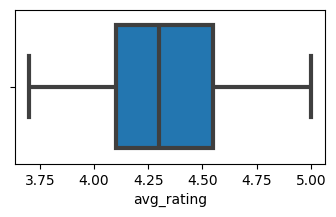

In [208]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'avg_rating', data = df_resto_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

# reviso valor maximo y minimo. Creo que estan en el rango correcto
print('min, ', df_resto_sindup['avg_rating'].min())
print('max, ', df_resto_sindup['avg_rating'].max())
print('mean, ', df_resto_sindup['avg_rating'].mean())

<Axes: xlabel='num_of_reviews'>

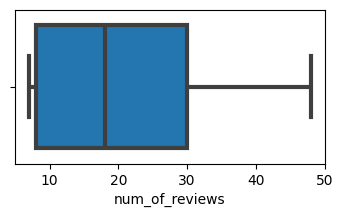

In [209]:
# reviso outliers en num_of_reviews
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'num_of_reviews', data = df_resto_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [210]:
# algunos tienen mas de 30 reviews
df_resto_sindup[df_resto_sindup['num_of_reviews'] > 10]

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
24711,0x809467352f2ce435:0x9d7881ae2a25c1b0,Piara Pizza,3131 N Maroa Ave,Fresno,CA,93704,36.779041,-119.800262,4.3,26
26143,0x80c2971865b00631:0x1d360a4bfe47e631,Chit Chat Restaurant Cafe Lounge,7115 Van Nuys Blvd,Van Nuys,CA,91405,34.199821,-118.449029,4.8,18
6738,0x80c2c7726b53b8e5:0xad288d11654f5e48,PIZZA ROW RECORDS,433 E 7th St,Los Angeles,CA,90014,34.041406,-118.247477,4.3,34
3496,0x88e4da67c34f944f:0xebfb9e95808a1397,Jonesy's Pizza Pub,511 Ocean Blvd,St Simons Island,GA,31522,31.136667,-81.394167,4.2,48


In [211]:
# pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [212]:
# Initialize geocoder
geolocator = Nominatim(user_agent="geo_checker")

# Function to get latitude & longitude from full address
def get_lat_long(address, city, state, zip_code):
    full_address = f"{address}, {city}, {state} {zip_code}"
    try:
        location = geolocator.geocode(full_address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [213]:
# Apply the function to fetch verified coordinates
df_resto_sindup[['verified_latitude', 'verified_longitude']] = df_resto_sindup.apply(
    lambda row: pd.Series(get_lat_long(row['address'], row['city'], row['state'], row['zip_code'])), axis=1
)


In [214]:
# Compare the existing vs verified coordinates
df_resto_sindup['lat_diff'] = abs(df_resto_sindup['latitude'] - df_resto_sindup['verified_latitude'])
df_resto_sindup['long_diff'] = abs(df_resto_sindup['longitude'] - df_resto_sindup['verified_longitude'])

In [215]:
# Check rows where the difference is significant (e.g., > 0.01 degrees)
incorrect_coords = df_resto_sindup[(df_resto_sindup['lat_diff'] > 0.01) | (df_resto_sindup['long_diff'] > 0.01)]

# Display incorrect rows
print(incorrect_coords[['address', 'city', 'state', 'zip_code', 
                        'latitude', 'longitude', 'verified_latitude', 'verified_longitude', 
                        'lat_diff', 'long_diff']])

             address              city state zip_code   latitude  longitude  \
3496  511 Ocean Blvd  St Simons Island    GA    31522  31.136667 -81.394167   

      verified_latitude  verified_longitude  lat_diff  long_diff  
3496           31.14653          -81.374562  0.009864   0.019605  


In [216]:
df_resto_sindup['lat_diff'] = abs(df_resto_sindup['latitude'] - df_resto_sindup['verified_latitude'])

In [217]:
# guardo df_mt_pizza_NJNY_sindup
df_resto_sindup.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\maps\df_resto_sindup_verif_coord.parquet' , engine='fastparquet')

In [218]:
# reemplazo las latitudes por las correctas
df_resto_sindup['latitude'] = df_resto_sindup.apply(lambda x: x['verified_latitude'] if x['lat_diff'] > 0.01 else x['latitude'], axis=1)

In [219]:
# reemplazo las longitudes por las correctas
df_resto_sindup['longitude'] = df_resto_sindup.apply(lambda x: x['verified_longitude'] if x['long_diff'] > 0.01 else x['longitude'], axis=1)

In [220]:
# elimino las columnas intermedias
df_resto_sindup.drop(columns=['verified_latitude', 'verified_longitude', 'lat_diff', 'long_diff'], inplace=True)

In [221]:
df_resto_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 24711 to 3496
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         7 non-null      object 
 1   business_name   7 non-null      object 
 2   address         7 non-null      object 
 3   city            7 non-null      object 
 4   state           7 non-null      object 
 5   zip_code        7 non-null      object 
 6   latitude        7 non-null      float64
 7   longitude       7 non-null      float64
 8   avg_rating      7 non-null      float64
 9   num_of_reviews  7 non-null      int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 616.0+ bytes


In [223]:
# guardo df_mt_pizza_NJNY final 202502081554
df_resto_sindup.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\maps\df.parquet' , engine='fastparquet')